In [5]:
import scipy.stats
import matplotlib.pyplot as plt
import copy
from sklearn import linear_model

import matplotlib
from scipy import stats
from scipy.optimize import curve_fit
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import seaborn as sns
import json
import statsmodels.api as sm

import pandas as pd
import numpy as np
import folium
from folium.features import DivIcon
import requests
from bs4 import BeautifulSoup
import re

%matplotlib inline

/Users/manavdutta1/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
import sys
!{sys.executable} -m pip install squarify

In [7]:
import squarify

County names retrieved from Wikipedia and extracted with Python command lines.

In [2]:
newJerseyCounties = ["Atlantic", "Bergen", "Burlington", "Cape May", "Cumberland", "Essex", "Gloucester", "Hudson", "Hunterdon", "Mercer", "Middlesex", "Monmouth", "Morris", "Ocean", "Passaic", "Salem", "Somerset", "Sussex","Union", "Warren"]
californiaCounties = ['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba']
vermontCounties = ['Addison', 'Bennington', 'Caledonia', 'Chittenden', 'Essex', 'Franklin', 'Grand Isle', 'Lamoille', 'Orange', 'Orleans', 'Rutland', 'Washington', 'Windham', 'Windsor']
arizonaCounties = ["Apache", "Cochise", "Coconino", "Gila", "Graham", "Greenlee", "La Paz", "Maricopa", "Mohave", "Navajo", "Pima", "Pinal", "Santa Cruz", "Yavapai", "Yuma"]
georgiaCounties = ['Appling', 'Atkinson', 'Bacon', 'Baker', 'Baldwin', 'Banks', 'Barrow', 'Bartow', 'Ben Hill', 'Berrien', 'Bibb', 'Bleckley', 'Brantley', 'Brooks', 'Bryan', 'Bulloch', 'Burke', 'Butts', 'Calhoun', 'Camden', 'Candler', 'Carroll', 'Catoosa', 'Charlton', 'Chatham', 'Chattahoochee', 'Chattooga', 'Cherokee', 'Clarke', 'Clay', 'Clayton', 'Clinch', 'Cobb', 'Coffee', 'Colquitt', 'Columbia', 'Cook', 'Coweta', 'Crawford', 'Crisp', 'Dade', 'Dawson', 'Decatur', 'DeKalb', 'Dodge', 'Dooly', 'Dougherty', 'Douglas', 'Early', 'Echols', 'Effingham', 'Elbert', 'Emanuel', 'Evans', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Franklin', 'Fulton', 'Gilmer', 'Glascock', 'Glynn', 'Gordon', 'Grady', 'Greene', 'Gwinnett', 'Habersham', 'Hall', 'Hancock', 'Haralson', 'Harris', 'Hart', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson', 'Jasper', 'Jeff Davis', 'Jefferson', 'Jenkins', 'Johnson', 'Jones', 'Lamar', 'Lanier', 'Laurens', 'Lee', 'Liberty', 'Lincoln', 'Long', 'Lowndes', 'Lumpkin', 'Macon', 'Madison', 'Marion', 'McDuffie', 'McIntosh', 'Meriwether', 'Miller', 'Mitchell', 'Monroe', 'Montgomery', 'Morgan', 'Murray', 'Muscogee', 'Newton', 'Oconee', 'Oglethorpe', 'Paulding', 'Peach', 'Pickens', 'Pierce', 'Pike', 'Polk', 'Pulaski', 'Putnam', 'Quitman', 'Rabun', 'Randolph', 'Richmond', 'Rockdale', 'Schley', 'Screven', 'Seminole', 'Spalding', 'Stephens', 'Stewart', 'Sumter', 'Talbot', 'Taliaferro', 'Tattnall', 'Taylor', 'Telfair', 'Terrell', 'Thomas', 'Tift', 'Toombs', 'Towns', 'Treutlen', 'Troup', 'Turner', 'Twiggs', 'Union', 'Upson', 'Walker', 'Walton', 'Ware', 'Warren', 'Washington', 'Wayne', 'Webster', 'Wheeler', 'White', 'Whitfield', 'Wilcox', 'Wilkes', 'Wilkinson', 'Worth']
oregonCounties = ['Baker', 'Benton', 'Clackamas', 'Clatsop', 'Columbia', 'Coos', 'Crook', 'Curry', 'Deschutes', 'Douglas', 'Gilliam', 'Grant', 'Harney', 'Hood River', 'Jackson', 'Jefferson', 'Josephine', 'Klamath', 'Lake', 'Lane', 'Lincoln', 'Linn', 'Malheur', 'Marion', 'Morrow', 'Multnomah', 'Polk', 'Sherman', 'Tillamook', 'Umatilla', 'Union', 'Wallowa', 'Wasco', 'Washington', 'Wheeler', 'Yamhill']
floridaCounties = ["Alachua","Baker","Bay","Bradford","Brevard","Broward","Calhoun","Charlotte","Citrus","Clay","Collier","Columbia","DeSoto","Dixie","Duval","Escambia","Flagler","Franklin","Gadsden","Gilchrist","Glades","Gulf","Hamilton","Hardee","Hendry","Hernando","Highlands","Hillsborough","Holmes","Indian River","Jackson","Jefferson","Lafayette","Lake","Lee","Leon","Levy","Liberty","Madison","Manatee","Marion","Martin","Miami-Dade","Monroe","Nassau","Okaloosa","Okeechobee","Orange","Osceola","Palm Beach","Pasco","Pinellas","Polk","Putnam","Santa Rosa","Sarasota","Seminole","St. Johns","St. Lucie","Sumter","Suwannee","Taylor","Union","Volusia","Wakulla","Walton","Washington"]
illinoisCounties = ["Adams","Alexander","Bond","Boone","Brown","Bureau","Calhoun","Carroll","Cass","Champaign","Christian","Clark","Clay","Clinton","Coles","Cook","Crawford","Cumberland","De Witt","DeKalb","Douglas","DuPage","Edgar","Edwards","Effingham","Fayette","Ford","Franklin","Fulton","Gallatin","Greene","Grundy","Hamilton","Hancock","Hardin","Henderson","Henry","Iroquois","Jackson","Jasper","Jefferson","Jersey","Jo Daviess","Johnson","Kane","Kankakee","Kendall","Knox","LaSalle","Lake","Lawrence","Lee","Livingston","Logan","Macon","Macoupin","Madison","Marion","Marshall","Mason","Massac","McDonough","McHenry","McLean","Menard","Mercer","Monroe","Montgomery","Morgan","Moultrie","Ogle","Peoria","Perry","Piatt","Pike","Pope","Pulaski","Putnam","Randolph","Richland","Rock Island","Saline","Sangamon","Schuyler","Scott","Shelby","St. Clair","Stark","Stephenson","Tazewell","Union","Vermilion","Wabash","Warren","Washington","Wayne","White","Whiteside","Will","Williamson","Winnebago","Woodford"]

In [38]:
newYorkCounties = ["Albany","Allegany","Bronx","Broome","Cattaraugus","Cayuga","Chautauqua","Chemung","Chenango","Clinton","Columbia","Cortland","Delaware","Dutchess","Erie","Essex","Franklin","Fulton","Genesee","Greene","Hamilton","Herkimer","Jefferson","Kings","Lewis","Livingston","Madison","Monroe","Montgomery","Nassau","New York","Niagara","Oneida","Onondaga","Ontario","Orange","Orleans","Oswego","Otsego","Putnam","Queens","Rensselaer","Richmond","Rockland","Saratoga","Schenectady","Schoharie","Schuyler","Seneca","St. Lawrence","Steuben","Suffolk","Sullivan","Tioga","Tompkins","Ulster","Warren","Washington","Wayne","Westchester","Wyoming","Yates"]

We use requests to extract the data and Beautiful Soup to parse it into a semi-readable form. Then we load it into a JSON dictionary and split on the county names to get the percentages. Data is formated with D percentage first and then R percentage last. This ensures that we can repeatedly scrape and load the data for each year without having to do tons of manual work to prepare the data in Excel.

In [5]:
newJerseyResults = pd.DataFrame({"counties": newJerseyCounties})
for year in range(1960, 2020, 4):
    res = requests.get("http://uselectionatlas.org/RESULTS/datagraph.php?year="+str(year)+"&fips=34&f=0&off=0&elect=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    newJerseyRegex = "|".join(newJerseyCounties)
    newJerseyDF = pd.read_html(str(table))
    dicto = json.loads(newJerseyDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(newJerseyRegex, dictString)
    for res in range(1, len(countyResults)):
        demP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[0][0:4])
        repP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[1][0:4])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
    
    print(len(demPercentages))
    newJerseyResults[str(year)+"D"] = demPercentages
    newJerseyResults[str(year)+"R"] = repPercentages

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [6]:
newJerseyResults.head()

counties     1960D     1960R     1964D     1964R     1968D     1968R  \
0    Atlantic  0.479550  0.520450  0.665647  0.334353  0.520501  0.479499   
1      Bergen  0.409820  0.590180  0.598196  0.401804  0.418977  0.581023   
2  Burlington  0.482966  0.517034  0.648649  0.351351  0.474461  0.525539   
3    Cape May  0.387000  0.613000  0.567134  0.432866  0.392449  0.607551   
4  Cumberland  0.521522  0.478478  0.727000  0.273000  0.540909  0.459091   

      1972D     1972R     1976D    ...        2000D     2000R     2004D  \
0  0.382139  0.617861  0.532787    ...     0.597322  0.402678  0.529768   
1  0.340404  0.659596  0.431911    ...     0.570691  0.429309  0.522659   
2  0.369278  0.630722  0.509184    ...     0.579111  0.420889  0.535282   
3  0.278403  0.721597  0.458248    ...     0.482402  0.517598  0.426842   
4  0.414487  0.585513  0.587045    ...     0.598759  0.401241  0.533605   

      2004R     2008D     2008R     2012D     2012R     2016D     2016R  
0  0.470232  0.576494  0.423506  0.585440  0.414560  0.536383  0.463617  
1  0.477341  0.548028  0.451972  0.557128  0.442872  0.568465  0.431535  
2  0.464718  0.593718  0.406282  0.591093  0.408907  0.577125  0.422875  
3  0.573158  0.456301  0.543699  0.456389  0.543611  0.397289  0.602711  
4  0.466395  0.609756  0.390244  0.622470  0.377530  0.531738  0.468262  

[5 rows x 31 columns]

We're ready to start computing the partisan lean for each county in the state of New Jersey.

In [3]:
#Computed these in IndResults.ipynb for the nation as a whole
demPercentageLeans = [0.500825614,
0.613447033,
0.495940536,
0.382138901,                     
0.510522856723,
0.446946585584,
0.408303802565,
0.460984413294,
0.534549190617,
0.547352633198,
0.50268045035,
0.487560132418,
0.536888475121,
0.51963862252,
0.511132908798]

In [8]:
i = 0
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    newJerseyResults['Partisan Lean '+str(year)] = newJerseyResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

newJerseyResults.head()

counties     1960D     1960R     1964D     1964R     1968D     1968R  \
0    Atlantic  0.479550  0.520450  0.665647  0.334353  0.520501  0.479499   
1      Bergen  0.409820  0.590180  0.598196  0.401804  0.418977  0.581023   
2  Burlington  0.482966  0.517034  0.648649  0.351351  0.474461  0.525539   
3    Cape May  0.387000  0.613000  0.567134  0.432866  0.392449  0.607551   
4  Cumberland  0.521522  0.478478  0.727000  0.273000  0.540909  0.459091   

      1972D     1972R     1976D         ...          Partisan Lean 1980  \
0  0.382139  0.617861  0.532787         ...                    0.005199   
1  0.340404  0.659596  0.431911         ...                   -0.071528   
2  0.369278  0.630722  0.509184         ...                   -0.024255   
3  0.278403  0.721597  0.458248         ...                   -0.088640   
4  0.414487  0.585513  0.587045         ...                    0.007302   

   Partisan Lean 1984  Partisan Lean 1988  Partisan Lean 1992  \
0           -0.004883           -0.028525            0.001470   
1           -0.042206           -0.046497           -0.044942   
2           -0.018133           -0.049279           -0.001554   
3           -0.091353           -0.116574           -0.088008   
4            0.009712           -0.004419            0.001300   

   Partisan Lean 1996  Partisan Lean 2000  Partisan Lean 2004  \
0            0.053777            0.094642            0.042208   
1            0.027975            0.068011            0.035098   
2            0.049886            0.076430            0.047722   
3           -0.041038           -0.020279           -0.060719   
4            0.085749            0.096079            0.046045   

   Partisan Lean 2008  Partisan Lean 2012  Partisan Lean 2016  
0            0.039606            0.065801            0.025250  
1            0.011140            0.037490            0.057332  
2            0.056830            0.071454            0.065992  
3           -0.080588           -0.063249           -0.113844  
4            0.072868            0.102831            0.020605  

[5 rows x 46 columns]

Now lets plot the data with folium and a widget like the one used for the states.

In [9]:
counties = pd.read_json('us-counties.json')
njCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    print(county)
    name = county["properties"]["name"]
    name = name.strip()
    if(i in range(1767, 1788)):
         njCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": njCounties}
with open('nj-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)


{'type': 'Feature', 'id': '1001', 'properties': {'name': 'Autauga'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-86.411786, 32.706342], [-86.411786, 32.410587], [-86.499417, 32.344863], [-86.817079, 32.339387], [-86.915664, 32.662526], [-86.411786, 32.706342]]]}}
{'type': 'Feature', 'id': '1003', 'properties': {'name': 'Baldwin'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.76459, 31.298768], [-87.616713, 31.243998], [-87.60028199999999, 30.997536], [-87.518128, 30.280057], [-88.005575, 30.685351], [-87.972714, 31.161844], [-87.945329, 31.194706], [-87.76459, 31.298768]]]}}
{'type': 'Feature', 'id': '1005', 'properties': {'name': 'Barbour'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-85.354736, 32.147694], [-85.053504, 32.06554], [-85.069935, 31.994339], [-85.141136, 31.780739], [-85.124705, 31.764308], [-85.414983, 31.621907], [-85.694307, 31.61643], [-85.749076, 31.61643], [-85.655968, 31.879324], [-85.409506, 32.147694], [-85.354736, 32.147694]]]}}
{'type': 

{'type': 'Feature', 'id': '13281', 'properties': {'name': 'Towns'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-83.936209, 34.984749], [-83.547346, 34.990226], [-83.651408, 34.820441], [-83.684269, 34.798533], [-83.782854, 34.793056], [-83.936209, 34.984749]]]}}
{'type': 'Feature', 'id': '13283', 'properties': {'name': 'Treutlen'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-82.550543, 32.498218], [-82.408142, 32.355817], [-82.654605, 32.295571], [-82.720328, 32.312002], [-82.649128, 32.514649], [-82.550543, 32.498218]]]}}
{'type': 'Feature', 'id': '13285', 'properties': {'name': 'Troup'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-84.938489, 33.226651], [-84.938489, 33.226651], [-84.861812, 33.193789], [-84.861812, 32.87065], [-85.184951, 32.87065], [-85.234244, 33.106158], [-85.234244, 33.128066], [-84.938489, 33.226651]]]}}
{'type': 'Feature', 'id': '13287', 'properties': {'name': 'Turner'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-83.613069, 31.85193

{'type': 'Feature', 'id': '23029', 'properties': {'name': 'Washington'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-67.954497, 44.41604], [-68.058559, 45.254012], [-68.047605, 45.637398], [-67.806619, 45.681213], [-66.979601, 44.804903], [-67.954497, 44.41604]]]}}
{'type': 'Feature', 'id': '23031', 'properties': {'name': 'York'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-70.780598, 43.813577], [-70.353397, 43.534253], [-70.703921, 43.057759], [-70.818936, 43.123482], [-70.961337, 43.53973], [-70.988722, 43.791669], [-70.780598, 43.813577]]]}}
{'type': 'Feature', 'id': '24001', 'properties': {'name': 'Allegany'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-78.809792, 39.722302], [-78.382591, 39.722302], [-78.344253, 39.722302], [-78.333299, 39.634671], [-78.470222, 39.514178], [-78.656438, 39.536086], [-78.738592, 39.623717], [-79.067209, 39.47584], [-78.930285, 39.722302], [-78.809792, 39.722302]]]}}
{'type': 'Feature', 'id': '24003', 'properties': {'name': 'Ann

{'type': 'Feature', 'id': '38101', 'properties': {'name': 'Ward'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-102.152512, 48.808546], [-102.021066, 48.808546], [-101.840327, 48.458022], [-101.062601, 48.458022], [-100.969493, 47.850082], [-101.873188, 47.850082], [-101.971773, 48.545653], [-102.234666, 48.545653], [-102.152512, 48.808546]]]}}
{'type': 'Feature', 'id': '38103', 'properties': {'name': 'Wells'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-100.000075, 47.850082], [-99.813859, 47.850082], [-99.299026, 47.844605], [-99.266165, 47.587189], [-99.266165, 47.329772], [-99.479765, 47.329772], [-99.863151, 47.329772], [-100.032936, 47.329772], [-100.071275, 47.844605], [-100.000075, 47.850082]]]}}
{'type': 'Feature', 'id': '38105', 'properties': {'name': 'Williams'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.047534, 48.633284], [-102.886422, 48.633284], [-102.886422, 48.545653], [-102.826176, 48.123929], [-103.171223, 48.134883], [-104.042057, 47.997959

{'type': 'Feature', 'id': '48491', 'properties': {'name': 'Williamson'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-97.831206, 30.904428], [-97.316374, 30.751074], [-97.157543, 30.455319], [-97.332805, 30.40055], [-97.371143, 30.41698], [-97.973607, 30.625104], [-98.050284, 30.625104], [-97.831206, 30.904428]]]}}
{'type': 'Feature', 'id': '48493', 'properties': {'name': 'Wilson'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-98.285792, 29.255869], [-98.132438, 29.442085], [-97.84216, 29.376362], [-97.727145, 29.223007], [-98.192684, 28.883437], [-98.406285, 29.113469], [-98.285792, 29.255869]]]}}
{'type': 'Feature', 'id': '48495', 'properties': {'name': 'Winkler'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-103.061684, 32.087447], [-102.798791, 32.087447], [-102.798791, 31.649292], [-103.330055, 31.649292], [-103.324578, 31.999816], [-103.061684, 32.087447]]]}}
{'type': 'Feature', 'id': '48497', 'properties': {'name': 'Wise'}, 'geometry': {'type': 'Polygon', 'coor

In [10]:
geo = r'nj-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(40, -74.4), zoom_start=7)
    yearCol = 'Partisan Lean ' + str(year)
    legendCol ='Partisan Lean ' + str(year)
    foliumMap.choropleth(geo_path=geo, data=newJerseyResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [11]:
slider = widgets.IntSlider(value=1960, min=1960, max=2016, step=4)
interact(constructMap, year=slider)
None

It looks like the center and northeast have shifted to become solidly blue, making
New Jersey solidly liberal as of today.

Time to do Oregon, another state that shifted from leaning Republican to solidly Democratic.

In [12]:
oregonResults = pd.DataFrame({"counties": oregonCounties})
for year in range(1960, 2020, 4):
    res = requests.get("http://uselectionatlas.org/RESULTS/datagraph.php?year="+str(year)+"&fips=41&f=0&off=0&elect=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    oregonRegex = "|".join(oregonCounties)
    oregonDF = pd.read_html(str(table))
    dicto = json.loads(oregonDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(oregonRegex, dictString)
    for res in range(1, len(countyResults)):
        demP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[0][0:4])
        repP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[1][0:4])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
    
    oregonResults[str(year)+"D"] = demPercentages
    oregonResults[str(year)+"R"] = repPercentages

In [13]:
i = 0
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    oregonResults['Partisan Lean '+str(year)] = oregonResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

oregonResults.head()

counties     1960D     1960R     1964D     1964R     1968D     1968R  \
0      Baker  0.515000  0.485000  0.594188  0.405812  0.426869  0.573131   
1     Benton  0.356000  0.644000  0.552846  0.447154  0.359457  0.640543   
2  Clackamas  0.453908  0.546092  0.626627  0.373373  0.463415  0.536585   
3    Clatsop  0.509529  0.490471  0.675351  0.324649  0.517970  0.482030   
4   Columbia  0.560000  0.440000  0.756784  0.243216  0.590323  0.409677   

      1972D     1972R     1976D         ...          Partisan Lean 1980  \
0  0.373016  0.626984  0.497399         ...                   -0.100368   
1  0.421377  0.578623  0.433298         ...                    0.020538   
2  0.438025  0.561975  0.471324         ...                   -0.018706   
3  0.501053  0.498947  0.519577         ...                    0.067305   
4  0.528711  0.471289  0.605236         ...                    0.071112   

   Partisan Lean 1984  Partisan Lean 1988  Partisan Lean 1992  \
0           -0.075638           -0.021606           -0.078962   
1            0.065592            0.086513            0.073923   
2           -0.000488            0.032403           -0.006094   
3            0.091696            0.114526            0.086889   
4            0.104259            0.122178            0.079511   

   Partisan Lean 1996  Partisan Lean 2000  Partisan Lean 2004  \
0           -0.156562           -0.221497           -0.192244   
1            0.032880            0.048782            0.101871   
2           -0.015389           -0.006369            0.005868   
3            0.044628            0.041596            0.064375   
4            0.051693            0.021539            0.026726   

   Partisan Lean 2008  Partisan Lean 2012  Partisan Lean 2016  
0           -0.204938           -0.226445           -0.286598  
1            0.125315            0.129576            0.173439  
2            0.015932           -0.001120            0.024822  
3            0.061039            0.056403            0.021070  
4            0.026067            0.007615           -0.076548  

[5 rows x 46 columns]

In [14]:
oregonCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    if(i in range(2200, 2236)):
         oregonCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": oregonCounties}
with open('or-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

In [15]:
#using oregon now for the geography
geo = r'or-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(45, -122), zoom_start=6)
    yearCol = 'Partisan Lean ' + str(year)
    legendCol ='Partisan Lean ' + str(year)
    foliumMap.choropleth(geo_path=geo, data=oregonResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [16]:
slider = widgets.IntSlider(value=1960, min=1960, max=2016, step=4)
interact(constructMap, year=slider)
None

Lets do Arizona now.

In [57]:
arizonaResults = pd.DataFrame({"counties": arizonaCounties})
for year in range(1976, 2020, 4):
    res = requests.get("http://uselectionatlas.org/RESULTS/datagraph.php?year="+str(year)+"&fips=4&f=0&off=0&elect=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    totalVotes = []
    arizonaRegex = "|".join(arizonaCounties)
    arizonaDF = pd.read_html(str(table))
    dicto = json.loads(arizonaDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(arizonaRegex, dictString)
    print(countyResults)
    for res in range(1, len(countyResults)):
        demP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[0][0:4])
        repP = float(re.findall("\d{2}.\d{1}%", countyResults[res])[1][0:4])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
        
        tallyTotal = 0
        for tally in tallyMatches:
            print(tally)
            tallyTotal += int(tally.split("\xa0")[0].replace(",",""))
            
        totalVotes.append(tallyTotal)
    
    if (len(demPercentages) == 14):
        demPercentages.insert(6, 0.01)
        totalVotes.append(2)
    if (len(repPercentages) == 14):
        repPercentages.insert(6, 0.01)
            
        
    print(len(demPercentages))
    print(totalVotes)
    arizonaResults[str(year)+"D"] = demPercentages
    arizonaResults[str(year)+"R"] = repPercentages
    arizonaResults[str(year)+"Total"] = totalVotes

['', 'Carter63.7%6,583\xa0Ford33.4%3,447\xa0Other2.9%297\xa0', 'Carter46.7%9,281\xa0Ford49.9%9,921\xa0Other3.4%681\xa0', 'Carter44.1%9,450\xa0Ford51.5%11,036\xa0Other4.4%932\xa0', 'Carter53.8%6,440\xa0Ford42.9%5,136\xa0Other3.2%386\xa0', 'Carter43.8%3,050\xa0Ford52.6%3,659\xa0Other3.6%249\xa0', 'Carter61.2%2,601\xa0Ford36.1%1,532\xa0Other2.7%114\xa0', 'Carter34.5%144,613\xa0Ford61.7%258,262\xa0Other3.8%15,966\xa0', 'Carter44.4%6,504\xa0Ford51.9%7,601\xa0Other3.7%535\xa0', 'Carter50.3%7,323\xa0Ford46.7%6,796\xa0Other3.0%441\xa0', 'Carter45.9%71,214\xa0Ford49.8%77,264\xa0Other4.2%6,583\xa0', 'Carter51.4%10,595\xa0Ford45.4%9,354\xa0Other3.2%655\xa0', 'Carter47.8%2,265\xa0Ford48.8%2,312\xa0Other3.4%161\xa0', 'Carter35.6%7,685\xa0Ford60.2%12,998\xa0Other4.2%917\xa0', 'Carter44.7%7,998\xa0Ford52.1%9,324\xa0Other3.1%558']
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,660 
27 
3,659 
5,66

['', 'Gore66.9%13,025\xa0Bush30.6%5,947\xa0Nader1.3%245\xa0Other1.2%239\xa0', 'Gore40.2%13,360\xa0Bush54.7%18,180\xa0Nader3.3%1,113\xa0Other1.8%588\xa0', 'Gore49.6%20,280\xa0Bush43.0%17,562\xa0Nader6.1%2,478\xa0Other1.4%563\xa0', 'Gore43.4%7,700\xa0Bush51.6%9,158\xa0Nader2.8%497\xa0Other2.1%381\xa0', 'Gore34.7%3,355\xa0Bush62.2%6,007\xa0Nader1.5%144\xa0Other1.6%158\xa0', 'Gore41.1%1,216\xa0Bush54.7%1,619\xa0Nader2.3%68\xa0Other1.9%57\xa0', 'Gore39.5%1,769\xa0Bush56.7%2,543\xa0Nader2.0%91\xa0Other1.8%80\xa0', 'Gore42.9%386,683\xa0Bush53.2%479,967\xa0Nader2.5%22,465\xa0Other1.4%12,584\xa0', 'Gore39.6%17,470\xa0Bush55.2%24,386\xa0Nader3.0%1,323\xa0Other2.2%962\xa0', 'Gore46.9%11,794\xa0Bush49.3%12,386\xa0Nader2.1%517\xa0Other1.8%450\xa0', 'Gore51.3%147,688\xa0Bush43.3%124,579\xa0Nader4.3%12,355\xa0Other1.0%3,018\xa0', 'Gore47.6%19,650\xa0Bush48.7%20,122\xa0Nader2.2%904\xa0Other1.5%614\xa0', 'Gore58.8%5,233\xa0Bush37.6%3,344\xa0Nader2.4%217\xa0Other1.1%99\xa0', 'Gore35.3%24,063\xa0Bush58.8

In [26]:
i = 0
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    arizonaResults['Partisan Lean '+str(year)] = arizonaResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

arizonaResults.head()

counties     1960D     1960R  1960Total     1964D     1964R  1964Total  \
0    Apache  0.482482  0.517518    17322.0  0.525000  0.475000    17322.0   
1   Cochise  0.494494  0.505506    17322.0  0.542000  0.458000    17322.0   
2  Coconino  0.454910  0.545090    17322.0  0.477477  0.522523    17322.0   
3      Gila  0.579580  0.420420    17322.0  0.647648  0.352352    17322.0   
4    Graham  0.456000  0.544000    17322.0  0.512000  0.488000    17322.0   

      1968D     1968R  1968Total         ...          Partisan Lean 1980  \
0  0.443575  0.556425    17322.0         ...                   -0.051225   
1  0.464160  0.535840    17322.0         ...                   -0.102233   
2  0.341463  0.658537    17322.0         ...                   -0.098055   
3  0.572414  0.427586    17322.0         ...                   -0.040932   
4  0.425791  0.574209    17322.0         ...                   -0.076810   

   Partisan Lean 1984  Partisan Lean 1988  Partisan Lean 1992  \
0            0.154764            0.164651            0.175277   
1           -0.037222           -0.033573           -0.024563   
2           -0.011981            0.007188            0.043780   
3            0.024320            0.015060            0.032532   
4           -0.038233           -0.061390           -0.085831   

   Partisan Lean 1996  Partisan Lean 2000  Partisan Lean 2004  \
0            0.174870            0.183473            0.164001   
1           -0.057557           -0.079077           -0.089787   
2            0.053099            0.032957            0.077217   
3            0.025237           -0.045838           -0.085133   
4           -0.064437           -0.144579           -0.188767   

   Partisan Lean 2008  Partisan Lean 2012  Partisan Lean 2016  
0            0.106041            0.155872            0.163540  
1           -0.141801           -0.133763           -0.128037  
2            0.049670            0.060176            0.094454  
3           -0.178071           -0.156002           -0.180633  
4           -0.242891           -0.210770           -0.219376  

[5 rows x 61 columns]

In [19]:
counties = pd.read_json('us-counties.json')
arizonaCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    print(name)
    print(i)
    if(i in range(94, 109)):
         arizonaCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": arizonaCounties}
with open('az-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

Autauga
0
Baldwin
1
Barbour
2
Bibb
3
Blount
4
Bullock
5
Butler
6
Calhoun
7
Chambers
8
Cherokee
9
Chilton
10
Choctaw
11
Clarke
12
Clay
13
Cleburne
14
Coffee
15
Colbert
16
Conecuh
17
Coosa
18
Covington
19
Crenshaw
20
Cullman
21
Dale
22
Dallas
23
DeKalb
24
Elmore
25
Escambia
26
Etowah
27
Fayette
28
Franklin
29
Geneva
30
Greene
31
Hale
32
Henry
33
Houston
34
Jackson
35
Jefferson
36
Lamar
37
Lauderdale
38
Lawrence
39
Lee
40
Limestone
41
Lowndes
42
Macon
43
Madison
44
Marengo
45
Marion
46
Marshall
47
Mobile
48
Monroe
49
Montgomery
50
Morgan
51
Perry
52
Pickens
53
Pike
54
Randolph
55
Russell
56
St. Clair
57
Shelby
58
Sumter
59
Talladega
60
Tallapoosa
61
Tuscaloosa
62
Walker
63
Washington
64
Wilcox
65
Winston
66
Aleutians East
67
Aleutians West
68
Anchorage
69
Bethel
70
Bristol Bay
71
Denali
72
Dillingham
73
Fairbanks North Star
74
Haines
75
Juneau
76
Kenai Peninsula
77
Ketchikan Gateway
78
Kodiak Island
79
Lake and Peninsula
80
Matanuska-Susitna
81
Nome
82
North Slope
83
Northwest Arctic
84
P

Carlton
1315
Carver
1316
Cass
1317
Chippewa
1318
Chisago
1319
Clay
1320
Clearwater
1321
Cook
1322
Cottonwood
1323
Crow Wing
1324
Dakota
1325
Dodge
1326
Douglas
1327
Faribault
1328
Fillmore
1329
Freeborn
1330
Goodhue
1331
Grant
1332
Hennepin
1333
Houston
1334
Hubbard
1335
Isanti
1336
Itasca
1337
Jackson
1338
Kanabec
1339
Kandiyohi
1340
Kittson
1341
Koochiching
1342
Lac qui Parle
1343
Lake
1344
Lake of the Woods
1345
Le Sueur
1346
Lincoln
1347
Lyon
1348
McLeod
1349
Mahnomen
1350
Marshall
1351
Martin
1352
Meeker
1353
Mille Lacs
1354
Morrison
1355
Mower
1356
Murray
1357
Nicollet
1358
Nobles
1359
Norman
1360
Olmsted
1361
Otter Tail
1362
Pennington
1363
Pine
1364
Pipestone
1365
Polk
1366
Pope
1367
Ramsey
1368
Red Lake
1369
Redwood
1370
Renville
1371
Rice
1372
Rock
1373
Roseau
1374
St. Louis
1375
Scott
1376
Sherburne
1377
Sibley
1378
Stearns
1379
Steele
1380
Stevens
1381
Swift
1382
Todd
1383
Traverse
1384
Wabasha
1385
Wadena
1386
Waseca
1387
Washington
1388
Watonwan
1389
Wilkin
1390
Winona
13

2558
Comal
2559
Comanche
2560
Concho
2561
Cooke
2562
Coryell
2563
Cottle
2564
Crane
2565
Crockett
2566
Crosby
2567
Culberson
2568
Dallam
2569
Dallas
2570
Dawson
2571
Deaf Smith
2572
Delta
2573
Denton
2574
DeWitt
2575
Dickens
2576
Dimmit
2577
Donley
2578
Duval
2579
Eastland
2580
Ector
2581
Edwards
2582
Ellis
2583
El Paso
2584
Erath
2585
Falls
2586
Fannin
2587
Fayette
2588
Fisher
2589
Floyd
2590
Foard
2591
Fort Bend
2592
Franklin
2593
Freestone
2594
Frio
2595
Gaines
2596
Galveston
2597
Garza
2598
Gillespie
2599
Glasscock
2600
Goliad
2601
Gonzales
2602
Gray
2603
Grayson
2604
Gregg
2605
Grimes
2606
Guadalupe
2607
Hale
2608
Hall
2609
Hamilton
2610
Hansford
2611
Hardeman
2612
Hardin
2613
Harris
2614
Harrison
2615
Hartley
2616
Haskell
2617
Hays
2618
Hemphill
2619
Henderson
2620
Hidalgo
2621
Hill
2622
Hockley
2623
Hood
2624
Hopkins
2625
Houston
2626
Howard
2627
Hudspeth
2628
Hunt
2629
Hutchinson
2630
Irion
2631
Jack
2632
Jackson
2633
Jasper
2634
Jeff Davis
2635
Jefferson
2636
Jim Hogg
2637
Jim

In [20]:
#using oregon now for the geography
geo = r'az-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(35, -112.07), zoom_start=6)
    yearCol = 'Partisan Lean ' + str(year)
    legendCol ='Partisan Lean ' + str(year)
    foliumMap.choropleth(geo_path=geo, data=arizonaResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [21]:
slider = widgets.IntSlider(value=1960, min=1960, max=2016, step=4)
interact(constructMap, year=slider)
None

It looks like Maricopa and Yuma counties are starting to trend Democratic. The Tucson area is also one area that has trended Democratic in recent years, and would be a key area to focus on in 2020.

And finally the Peach State:

In [22]:
georgiaResults = pd.DataFrame({"counties": georgiaCounties})
for year in range(1964, 2020, 4):
    res = requests.get("http://uselectionatlas.org/RESULTS/datagraph.php?year="+str(year)+"&fips=13&f=0&off=0&elect=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    georgiaRegex = "|".join(georgiaCounties)
    georgiaDF = pd.read_html(str(table))
    dicto = json.loads(georgiaDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(georgiaRegex, dictString)
    for res in range(1, len(countyResults)):
       if(countyResults[res]):
        matches = re.findall("\d{0,2}.\d{0,2}%", countyResults[res])
        demP = float(matches[0].split("%")[0])
        repP = float(matches[1].split("%")[0])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)

    georgiaResults[str(year)+"D"] = demPercentages
    georgiaResults[str(year)+"R"] = repPercentages

IndexError: list index out of range

In [ ]:
i = 1
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    georgiaResults['Partisan Lean '+str(year)] = georgiaResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

georgiaResults.head()

In [ ]:
counties = pd.read_json('us-counties.json')
georgiaCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    if(i in range(384, 543)):
         georgiaCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": georgiaCounties}
with open('ga-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

In [ ]:
#using oregon now for the geography
geo = r'ga-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(32.8, -83.63), zoom_start=6)
    yearCol = 'Partisan Lean ' + str(year)
    legendCol ='Partisan Lean ' + str(year)
    foliumMap.choropleth(geo_path=geo, data=georgiaResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [ ]:
slider = widgets.IntSlider(value=1968, min=1968, max=2016, step=4)
interact(constructMap, year=slider)
None

Ah Georgia, how it went from the solidly blue home state of Jimmy Carter to a Republican stronghold. The state's democratic strongholds are clustered around the metro area, Augusta, and the Savannah area, indicating that Democratic strength is clustered in the cities while Republicans are predominant in the rural areas. Future elections in the state will hinge on rural vs urban turnout, as well as Democrats being able to turn out voters in predominantly African-American counties as well.

In [ ]:
californiaResults = pd.DataFrame({"counties": californiaCounties})
for year in range(1960, 2020, 4):
    res = requests.get("https://uselectionatlas.org/RESULTS/datagraph.php?fips=6&year="+str(year)+"&off=0&elect=0&f=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    californiaRegex = "|".join(californiaCounties)
    californiaDF = pd.read_html(str(table))
    dicto = json.loads(californiaDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(californiaRegex, dictString)
    for res in range(1, len(countyResults)):
        matches = re.findall("\d{0,2}.\d{0,2}%", countyResults[res])
        demP = float(matches[0].split("%")[0])
        repP = float(matches[1].split("%")[0])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
    californiaResults[str(year)+"D"] = demPercentages
    californiaResults[str(year)+"R"] = repPercentages        
#     total = demP + repP
#     demPercentages.append((demP*1.0)/total)
#         repPercentages.append((repP*1.0)/total)
    
    californiaResults[str(year)+"D"] = demPercentages
    californiaResults[str(year)+"R"] = repPercentages

In [ ]:
i = 0
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    californiaResults['Partisan Lean '+str(year)] = californiaResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

californiaResults.head()

In [ ]:
counties = pd.read_json('us-counties.json')
californiaCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    if(county["id"][0] == "6"):
         californiaCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": californiaCounties}
with open('ca-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

In [ ]:
#using california now for the geography
geo = r'ca-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(36.7783, -119.4179), zoom_start=5)
    yearCol = "Partisan Lean " + str(year)
    legendCol = "Partisan Lean " + str(year)
    foliumMap.choropleth(geo_path=geo, data=californiaResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [ ]:
slider = widgets.IntSlider(value=1960, min=1960, max=2016, step=4)
interact(constructMap, year=slider)
None

In [ ]:
vermontResults = pd.DataFrame({"counties": vermontCounties})
for year in range(1960, 2020, 4):
    res = requests.get("https://uselectionatlas.org/RESULTS/datagraph.php?fips=50&year="+str(year)+"&off=0&elect=0&f=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    vermontRegex = "|".join(vermontCounties)
    vermontDF = pd.read_html(str(table))
    dicto = json.loads(vermontDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(vermontRegex, dictString)
    for res in range(1, len(countyResults)):
        matches = re.findall("\d{0,2}.\d{0,2}%", countyResults[res])
        demP = float(matches[0].split("%")[0])
        repP = float(matches[1].split("%")[0])
        total = demP + repP
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
    
    vermontResults[str(year)+"D"] = demPercentages
    vermontResults[str(year)+"R"] = repPercentages

In [ ]:
i = 0
for year in range(1960, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    vermontResults['Partisan Lean '+str(year)] = vermontResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

vermontResults.head()

In [ ]:
counties = pd.read_json('us-counties.json')
vermontCounties = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    if(i in range(2797, 2811)):
         vermontCounties.append(county)
            
jsonDict = {"type": "FeatureCollection", "features": vermontCounties}
with open('vt-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

In [ ]:
#using vermont now for the geography
geo = r'vt-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(44, -77), zoom_start=6)
    yearCol = "Partisan Lean " + str(year)
    legendCol = "Partisan Lean " + str(year)
    foliumMap.choropleth(geo_path=geo, data=vermontResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    return foliumMap

In [ ]:
vermontResults

In [ ]:
slider = widgets.IntSlider(value=1960, min=1960, max=2016, step=4)
interact(constructMap, year=slider)
None

In [61]:
arizonaResults = pd.DataFrame({"counties": arizonaCounties})
for year in range(1976, 2020, 4):
    arizonaSplitCounties = [county + "\D" for county in arizonaCounties[1:]]
    res = requests.get("http://uselectionatlas.org/RESULTS/datagraph.php?year="+str(year)+"&fips=4&f=0&off=0&elect=0")
    soup = BeautifulSoup(res.content,'lxml')
    table = soup.find_all('table')[0]
    demPercentages = []
    repPercentages = []
    totalVotes = []
    arizonaRegex = "|".join(arizonaSplitCounties)
    arizonaDF = pd.read_html(str(table))
    dicto = json.loads(arizonaDF[0].to_json(orient='records'))
    dictString = dicto[0]["0"]
    countyResults = re.split(arizonaRegex, dictString)
    print(len(countyResults))
    for res in range(0, len(countyResults)):
       if(countyResults[res]):
        matches = re.findall("\d{0,2}.\d{0,2}%", countyResults[res])
        tallyMatches = re.findall(r'\d+(?:,\d+)?\xa0', countyResults[res])
        
        demP = float(matches[0].split("%")[0])
        repP = float(matches[1].split("%")[0])
        total = demP + repP
        
        demPercentages.append((demP*1.0)/total)
        repPercentages.append((repP*1.0)/total)
        
        tallyTotal = 0
        for tally in tallyMatches:
            tallyTotal += int(tally.split("\xa0")[0].replace(",",""))
            
        totalVotes.append(tallyTotal)
    
    print(len(demPercentages))
    print(len(totalVotes))
    if (len(demPercentages) == 14):
        demPercentages.insert(6, 0.01)
        totalVotes.append(2)
    if (len(repPercentages) == 14):
        repPercentages.insert(6, 0.01)

    arizonaResults[str(year)+"D"] = demPercentages
    arizonaResults[str(year)+"R"] = repPercentages
    arizonaResults[str(year)+"Total"] = totalVotes

14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [62]:
print(arizonaResults["2016Total"])

0       27661
1       50015
2       59784
3       22515
4       12281
5        3300
6        5951
7     1567834
8       79943
9       40294
10     421640
11     129546
12      16433
13     114450
14      49864
Name: 2016Total, dtype: int64


In [63]:
for i in range(2020, 2044, 4):
    arizonaResults['Partisan Lean ' + str(year)] = pd.Series(np.random.randn(len(arizonaResults)), index=arizonaResults.index)

In [64]:
i = 0
for year in range(1976, 2020, 4):
    nationalDemPercentage = demPercentageLeans[i]
    arizonaResults['Partisan Lean '+str(year)] = arizonaResults[str(year)+'D'] - nationalDemPercentage
    i += 1  

arizonaResults['Partisan Lean 2016'].head()

0    0.171992
1   -0.119585
2    0.102906
3   -0.172181
4   -0.210923
Name: Partisan Lean 2016, dtype: float64

In [42]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [65]:
counties = pd.read_json('us-counties.json')
arizonacounties = []
arizonaPoints = []
for i in range(len(counties['features'])):
    county = counties.iloc[i]['features']
    name = county["properties"]["name"]
    name = name.strip()
    if(county["id"][0] == "4"):
         arizonacounties.append(county)
         print(arizonacounties)
         arizonaPoints.append(county["geometry"]["coordinates"][0])
jsonDict = {"type": "FeatureCollection", "features": arizonacounties}
with open('az-counties.json', 'w') as outfile:  
    json.dump(jsonDict, outfile)

[{'type': 'Feature', 'id': '4001', 'properties': {'name': 'Apache'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-110.000968, 37.000263], [-109.042503, 37.000263], [-109.04798, 36.00346], [-109.04798, 34.957364], [-109.04798, 34.579455], [-109.04798, 33.779822], [-109.497089, 33.653852], [-109.743552, 33.500498], [-109.891429, 33.566221], [-109.842137, 35.516012], [-110.000968, 35.663889], [-110.000968, 37.000263]]]}}]
[{'type': 'Feature', 'id': '4001', 'properties': {'name': 'Apache'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-110.000968, 37.000263], [-109.042503, 37.000263], [-109.04798, 36.00346], [-109.04798, 34.957364], [-109.04798, 34.579455], [-109.04798, 33.779822], [-109.497089, 33.653852], [-109.743552, 33.500498], [-109.891429, 33.566221], [-109.842137, 35.516012], [-110.000968, 35.663889], [-110.000968, 37.000263]]]}}, {'type': 'Feature', 'id': '4003', 'properties': {'name': 'Cochise'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-109.831183, 32.427018]

[{'type': 'Feature', 'id': '4001', 'properties': {'name': 'Apache'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-110.000968, 37.000263], [-109.042503, 37.000263], [-109.04798, 36.00346], [-109.04798, 34.957364], [-109.04798, 34.579455], [-109.04798, 33.779822], [-109.497089, 33.653852], [-109.743552, 33.500498], [-109.891429, 33.566221], [-109.842137, 35.516012], [-110.000968, 35.663889], [-110.000968, 37.000263]]]}}, {'type': 'Feature', 'id': '4003', 'properties': {'name': 'Cochise'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-109.831183, 32.427018], [-109.113704, 32.427018], [-109.04798, 32.427018], [-109.04798, 31.331629], [-110.461031, 31.331629], [-110.450077, 31.731446], [-110.450077, 32.427018], [-109.831183, 32.427018]]]}}, {'type': 'Feature', 'id': '4005', 'properties': {'name': 'Coconino'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-110.751309, 37.00574], [-110.751309, 34.261793], [-111.556419, 34.469916], [-111.775497, 34.979272], [-112.334144, 34.9737

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [44]:
print(arizonaPoints)

[[[-110.000968, 37.000263], [-109.042503, 37.000263], [-109.04798, 36.00346], [-109.04798, 34.957364], [-109.04798, 34.579455], [-109.04798, 33.779822], [-109.497089, 33.653852], [-109.743552, 33.500498], [-109.891429, 33.566221], [-109.842137, 35.516012], [-110.000968, 35.663889], [-110.000968, 37.000263]], [[-109.831183, 32.427018], [-109.113704, 32.427018], [-109.04798, 32.427018], [-109.04798, 31.331629], [-110.461031, 31.331629], [-110.450077, 31.731446], [-110.450077, 32.427018], [-109.831183, 32.427018]], [[-110.751309, 37.00574], [-110.751309, 34.261793], [-111.556419, 34.469916], [-111.775497, 34.979272], [-112.334144, 34.973795], [-112.438206, 35.258596], [-113.336425, 35.526966], [-113.352855, 36.047275], [-112.629899, 36.392322], [-112.542268, 37.000263], [-111.414018, 37.000263], [-110.751309, 37.00574]], [[-111.556419, 34.469916], [-110.751309, 34.261793], [-110.751309, 33.998899], [-110.000968, 33.998899], [-110.000968, 33.577175], [-110.450077, 33.193789], [-110.778693,

In [15]:
#using vermont now for the geography
geo = r'il-counties.json'
def constructMap(year):    
    foliumMap = folium.Map(location=(40, -90), zoom_start=6)
    yearCol = "Partisan Lean " + str(year)
    legendCol = "Partisan Lean " + str(year)
    foliumMap.choropleth(geo_data=geo, data=arizonaResults,
             columns=['counties', yearCol],
             key_on='feature.properties.name', threshold_scale=[-.10, -.05, 0, .05, .10],
             fill_color='RdBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=legendCol)
    a = 0
    for county in arizonaResults['counties']:
        latitude = None
        longitude = None
        longitude, latitude = centeroidnp(np.array(arizonaPoints[a]))
        folium.features.Marker(location=[latitude, longitude], icon=DivIcon(
        icon_size=(10,8),
        icon_anchor=(0,0),
        html='<div style="font-size: 6pt">'+ county + '</div>')).add_to(foliumMap)
        a += 1
    return foliumMap

In [ ]:
slider = widgets.IntSlider(value=1976, min=1976, max=2016, step=4)
interact(constructMap, year=slider)
None

In [ ]:
def constructTreemapForYear(year):    
    cmap = matplotlib.cm.RdBu
    floridaSorted = floridaResults.sort_values(str(year)+"Total", ascending=False)
    mini=min(floridaSorted['Partisan Lean '+str(year)])
    maxi=max(floridaSorted['Partisan Lean '+str(year)])
    norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    colors = [cmap(norm(value)) for value in floridaSorted['Partisan Lean '+str(year)]]
    
    plt.rc('font', size=22)
    squarify.plot(sizes=floridaSorted[str(year)+"Total"], label=floridaSorted['counties'], alpha=0.8, color=colors )
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(20, 16)
    plt.show()

In [ ]:
slider = widgets.IntSlider(value=1976, min=1976, max=2016, step=4)
interact(constructTreemapForYear, year=slider)
None

In [ ]:
demCountiesSums = []
repCountiesSums = []
demAverageLean = []
repAverageLean = []
years = list(range(1976, 2020, 4))
for year in years:
    demList = []
    repList = []
    for county in floridaResults['Partisan Lean ' + str(year)]:
        if (county > 0):
           demList.append(county)
        else:
           repList.append(county) 
        
    demCountiesSums.append(len(demList))
    repCountiesSums.append(len(repList))
    demAverageLean.append((sum(demList)*1.0)/len(demList))
    repAverageLean.append((sum(repList)*1.0)/len(repList))

In [ ]:
sumDataframe = pd.DataFrame({'year': years, 'demList': demCountiesSums, 'repList': repCountiesSums})
f, ax = plt.subplots(1, 1)
sns.pointplot(x="year", y="demList", data=sumDataframe, color='blue')
sns.pointplot(x="year", y="repList", data=sumDataframe, color='red')
ax.set_xlabel("Year")
ax.set_ylabel("Number of counties")
ax.set_yticks(list(range(0, 70, 5)))

In [1]:
leanDF = pd.DataFrame({'year': years, 'demList': demAverageLean, 'repList': repAverageLean})
f, ax = plt.subplots(1, 1)
sns.pointplot(x="year", y="demList", data=leanDF, color='blue')
sns.pointplot(x="year", y="repList", data=leanDF, color='red')
ax.set_xlabel("Year")
ax.set_ylabel("Partisan Lean")

yList = [-.2]
s = -.20
for a in range(20):
    s += .02
    yList.append(s)
    
ax.set_yticks(yList)

NameError: name 'pd' is not defined

In [66]:
def func(x, a, b):
    return a*np.log(x) + b

In [67]:
for i in range(0, len(arizonaResults)):
    partisans = []
    for year in range(1988, 2020, 4):
        partisans.append(arizonaResults.get_value(i, 'Partisan Lean ' + str(year)))
        
    popt, pcov = curve_fit(func, list(range(1988, 2020, 4)), partisans, maxfev=10000)
    
    for year in range(2020, 2044, 4):
        value = func(year, *popt)
        arizonaResults.set_value(i, 'Partisan Lean '+str(year), value)

In [47]:
slider = widgets.IntSlider(value=1976, min=1976, max=2040, step=4)
interact(constructMap, year=slider)
None

NameError: name 'constructMap' is not defined

In [ ]:
#southeast florida is key
#lets project turnouts linearly given existing trends and steady growth/deline in areas

In [68]:
for i in range(2020, 2044, 4):
    arizonaResults[str(year)+"Total"] = pd.Series(np.random.randn(len(arizonaResults)), index=arizonaResults.index)

In [69]:
i = 0
totalList = []
for year in range(1988, 2020, 4):
    total = arizonaResults.get_value(i, str(year)+"Total")
    totalList.append(total)

print(totalList)

[14544, 18258, 18684, 19456, 24198, 24355, 25917, 27661]


In [70]:
for i in range(0, len(arizonaResults)):
    partisans = []
    aList = []
    a = 1
    for year in range(1988, 2020, 4):
        partisans.append(arizonaResults.get_value(i, str(year)+"Total"))
        aList.append(a)
        a += 1
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(aList, partisans)
    print("Slope: " + str(slope))
    print("Intercept: " + str(intercept))
    
    val = 9
    for year in range(2020, 2044, 4):
        value = (slope * val) + intercept
        print(year)
        print(value)
        arizonaResults.set_value(i, str(year)+"Total", value)
        val += 1

Slope: 1807.96428571
Intercept: 13498.2857143
2020
29769.9642857
2024
31577.9285714
2028
33385.8928571
2032
35193.8571429
2036
37001.8214286
2040
38809.7857143
Slope: 3533.78571429
Intercept: 24004.9642857
2020
55809.0357143
2024
59342.8214286
2028
62876.6071429
2032
66410.3928571
2036
69944.1785714
2040
73477.9642857
Slope: 3570.46428571
Intercept: 30543.2857143
2020
62677.4642857
2024
66247.9285714
2028
69818.3928571
2032
73388.8571429
2036
76959.3214286
2040
80529.7857143
Slope: 1003.04761905
Intercept: 15027.2857143
2020
24054.7142857
2024
25057.7619048
2028
26060.8095238
2032
27063.8571429
2036
28066.9047619
2040
29069.952381
Slope: 545.333333333
Intercept: 8081.75
2020
12989.75
2024
13535.0833333
2028
14080.4166667
2032
14625.75
2036
15171.0833333
2040
15716.4166667
Slope: -75.7261904762
Intercept: 3580.89285714
2020
2899.35714286
2024
2823.63095238
2028
2747.9047619
2032
2672.17857143
2036
2596.45238095
2040
2520.72619048
Slope: 222.892857143
Intercept: 4076.35714286
2020
6082.3

In [71]:
arizonaResults["2016Total"]

0       27661
1       50015
2       59784
3       22515
4       12281
5        3300
6        5951
7     1567834
8       79943
9       40294
10     421640
11     129546
12      16433
13     114450
14      49864
Name: 2016Total, dtype: int64

In [72]:
arizonaResults["2040Total"]

0     3.880979e+04
1     7.347796e+04
2     8.052979e+04
3     2.906995e+04
4     1.571642e+04
5     2.520726e+03
6     7.196857e+03
7     2.306924e+06
8     1.220771e+05
9     5.818787e+04
10    5.883241e+05
11    2.150633e+05
12    2.398407e+04
13    1.748766e+05
14    7.086115e+04
Name: 2040Total, dtype: float64

In [73]:
slider = widgets.IntSlider(value=1976, min=1976, max=2040, step=4)
interact(constructTreemapForYear, year=slider)
None

NameError: name 'constructTreemapForYear' is not defined

In [74]:
arizonaDemTotals = []
arizonaRepubTotals = []

for year in range(1976, 2044, 4):
       dTotal = 0.0
       rTotal = 0.0
       if (year <= 2016):
          for i in range(len(arizonaResults)):
              dTotal += arizonaResults.get_value(i, str(year)+"D") * arizonaResults.get_value(i, str(year)+"Total") 
              rTotal += arizonaResults.get_value(i, str(year)+"R") * arizonaResults.get_value(i, str(year)+"Total")
       else: #based on partisan lean and national vote being tied
          for i in range(len(arizonaResults)):
              dPerc = .5 + arizonaResults.get_value(i, "Partisan Lean " + str(year))
              rPerc = .5 - arizonaResults.get_value(i, "Partisan Lean " + str(year)) 
              if (dPerc < 0):
                 dPerc = 0.0
              if (dPerc > 1):
                 dPerc = 1.0
              if (rPerc < 0):
                  rPerc = 0.0
              if (rPerc > 1):
                  rPerc = 1.0
                
              dTotal += arizonaResults.get_value(i, str(year)+"Total") * dPerc
              rTotal += arizonaResults.get_value(i, str(year)+"Total") * rPerc  
       
       print("Year: " + str(year) + "DemTotal: " + str(dTotal) + "RepTotal: " + str(rTotal))
       arizonaDemTotals.append(dTotal/(dTotal+rTotal))
       arizonaRepubTotals.append(rTotal/(dTotal+rTotal))

Year: 1976DemTotal: 164838.663534RepTotal: 166860.156466
Year: 1980DemTotal: 136324.23569RepTotal: 260160.44431
Year: 1984DemTotal: 337509.948951RepTotal: 688212.051049
Year: 1988DemTotal: 459951.899214RepTotal: 711646.100786
Year: 1992DemTotal: 720936.721292RepTotal: 765769.278708
Year: 1996DemTotal: 719204.663846RepTotal: 684966.336154
Year: 2000DemTotal: 716916.731988RepTotal: 816802.268012
Year: 2004DemTotal: 901042.237319RepTotal: 1114746.76268
Year: 2008DemTotal: 1052175.90589RepTotal: 1251026.09411
Year: 2012DemTotal: 1046433.65273RepTotal: 1259463.34727
Year: 2016DemTotal: 1251725.50188RepTotal: 1349785.49812
Year: 2020DemTotal: 1198448.22408RepTotal: 1580331.74021
Year: 2024DemTotal: 1249985.84796RepTotal: 1734562.08062
Year: 2028DemTotal: 1296471.99058RepTotal: 1893843.90228
Year: 2032DemTotal: 1337921.5172RepTotal: 2058162.33994
Year: 2036DemTotal: 1374349.21528RepTotal: 2227502.60614
Year: 2040DemTotal: 1409828.67735RepTotal: 2397791.10836


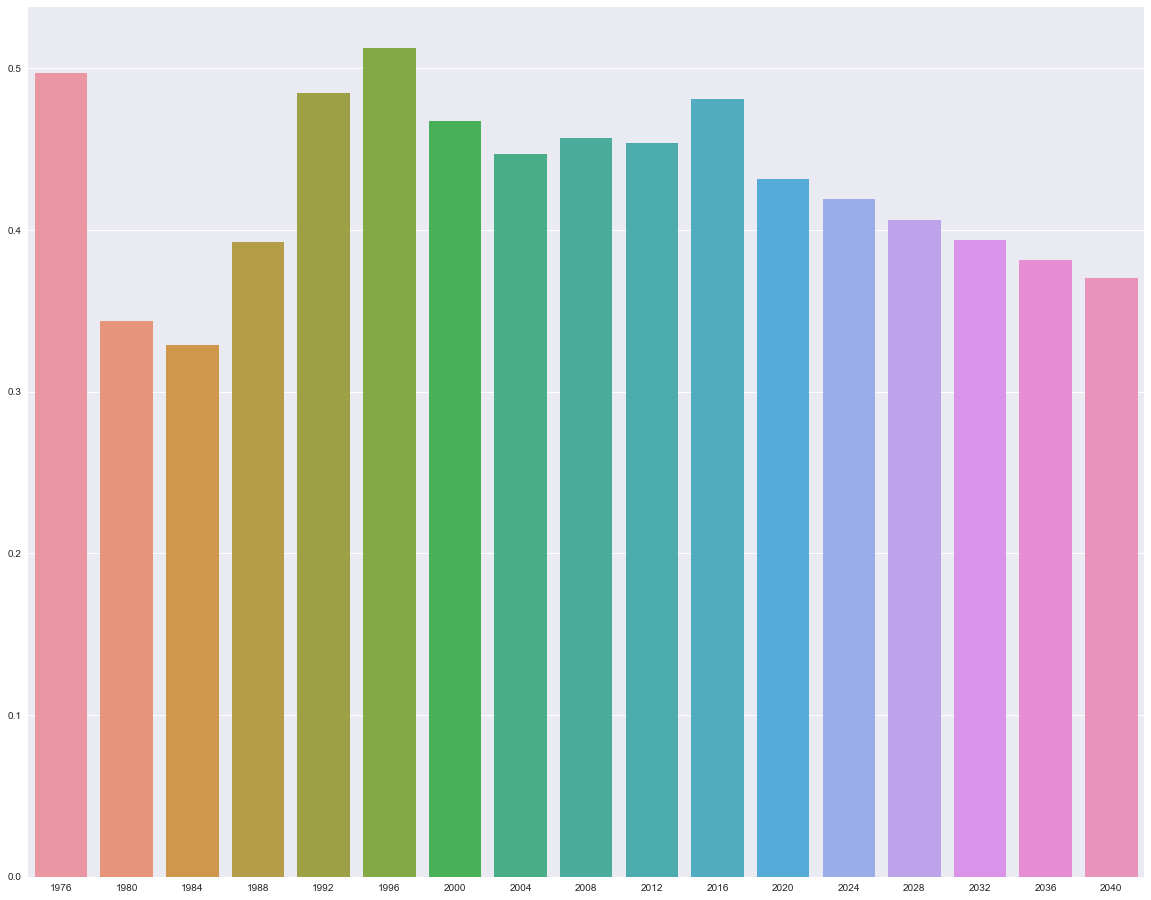

In [75]:
sns.barplot(x=list(range(1976, 2044, 4)), y=arizonaDemTotals)
fig = plt.gcf()

yList = []
s = 0.0
for a in range(20):
    s += .05
    yList.append(s)
    
ax.set_yticks(yList)
fig.set_size_inches(20, 16)

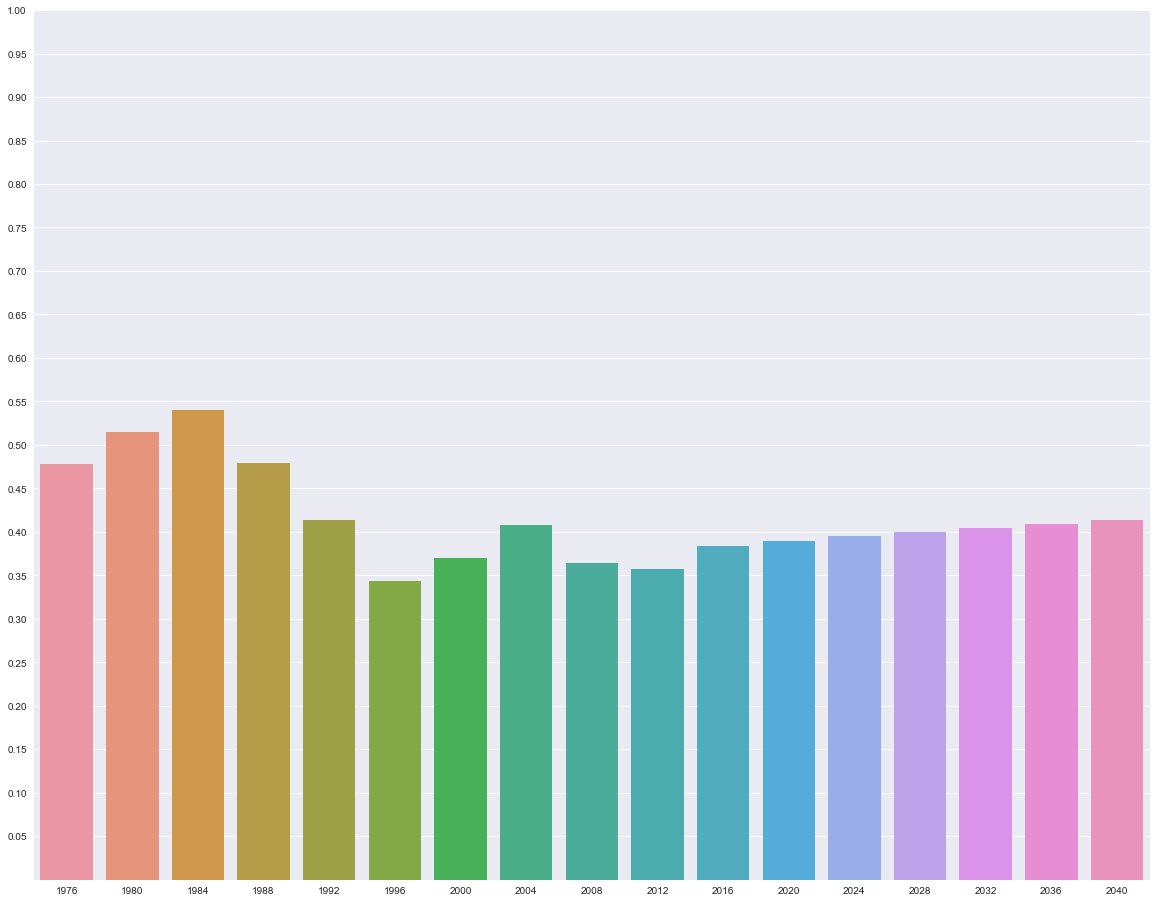

In [53]:
ax = sns.barplot(x=list(range(1976, 2044, 4)), y=arizonaRepubTotals)
fig = plt.gcf()

yList = []
s = 0.0
for a in range(20):
    s += .05
    yList.append(s)
    
ax.set_yticks(yList)
fig.set_size_inches(20, 16)

In [76]:
arizonaResults.to_csv('arizonaResults.csv')